# Import Statements

In [1]:
import pandas as pd
import json
import glob
from scipy import stats
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from matplotlib import font_manager
font_path = '/Users/abhik_bhattacharjee/Desktop/TextAnalytics/newcomputermodern/NewCM10-Regular.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [2]:
import os
import re
from nltk.corpus import stopwords

In [3]:
stopwords_list = stopwords.words('english')

# Conversation Transcripts and Stopword Extraction

In [4]:
folderTranscript = '/Users/abhik_bhattacharjee/Desktop/MSc CS IS SEM 2/Text Analytics/Group Project/transcripts and word frequencies/Normalised_Transcripts'

In [5]:
files = os.listdir(folderTranscript)

In [6]:
file_names = []
stopwordCount = []
session_names = []
speaker_names = []

In [7]:
for file in files:
    session_name, speaker_name = re.match(r'(.*?)_(.*?)\.txt', file).groups()
    with open(os.path.join(folderTranscript, file), 'r') as f:
        text = f.read()
    words = text.split()
    stopwordCounts = len([word for word in words if word.lower() in stopwords_list])
    file_names.append(file)
    stopwordCount.append(stopwordCounts)
    session_names.append(session_name)
    speaker_names.append(speaker_name)

df = pd.DataFrame({'File': file_names, 'SessionName': session_names, 'SpeakerName': speaker_names,
                   'StopwordCount': stopwordCount})

In [8]:
df = df.sort_values(by = ['SessionName', 'SpeakerName'])

In [9]:
dfMediator = df.iloc[::3, :]
dfPar1 = df.iloc[1::3, :]
dfPar2 = df.iloc[2::3, :]

# Likert Scale Responses

In [10]:
meanLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", 
                           sheet_name="Pivot-Mean")
medianLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", 
                             sheet_name="Pivot-Median")
stdDevLikert = pd.read_excel("MULTISIMO Corpus - Questionnaire - Likert Scale (Responses).xlsx", 
                             sheet_name="Pivot-StdDev")

In [11]:
check1 = itertools.islice(meanLikert.transpose()[8].tolist(), 1, None)
check2 = itertools.islice(meanLikert.transpose()[7].tolist(), 1, None)
check3 = itertools.islice(meanLikert.transpose()[6].tolist(), 1, None)
check4 = itertools.islice(meanLikert.transpose()[5].tolist(), 1, None)
check5 = itertools.islice(meanLikert.transpose()[4].tolist(), 1, None)
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in check1:
    list1.append(i)
for i in check2:
    list2.append(i)
for i in check3:
    list3.append(i)
for i in check3:
    list1.append(i)
for i in check4:
    list4.append(i)
for i in check5:
    list5.append(i)

# Correlation Analysis

## Spearman Correlation
- Number of Stopwords uttered by Mediator is correlated with Mediator Intervention
- Statistically Significant

### Mediator Interference

In [12]:
res = stats.spearmanr(dfMediator['StopwordCount'].tolist(), list1)

In [13]:
res

SpearmanrResult(correlation=0.4560999397718311, pvalue=0.057117272227593156)

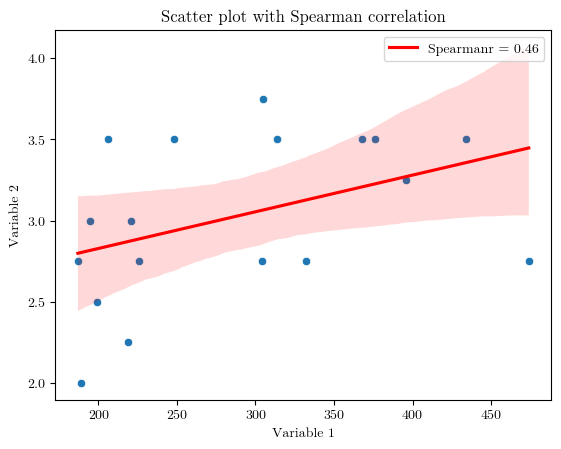

In [14]:
sns.scatterplot(x=dfMediator['StopwordCount'], y=list1)
sns.regplot(x=dfMediator['StopwordCount'], y=list1, scatter=False, color='r', 
            label=r'Spearmanr = {:.2f}'.format(res.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Spearman correlation')

plt.legend()
plt.show()

### Player1 Dominance and Involvement

In [15]:
res = stats.spearmanr(dfPar1['StopwordCount'].tolist(), list3)
res2 = stats.spearmanr(dfPar1['StopwordCount'].tolist(), list5)

In [21]:
print(res)
print(res2)

SpearmanrResult(correlation=0.40708684204933104, pvalue=0.09360819249366609)
PointbiserialrResult(correlation=0.4152022783973638, pvalue=0.08663196249871084)


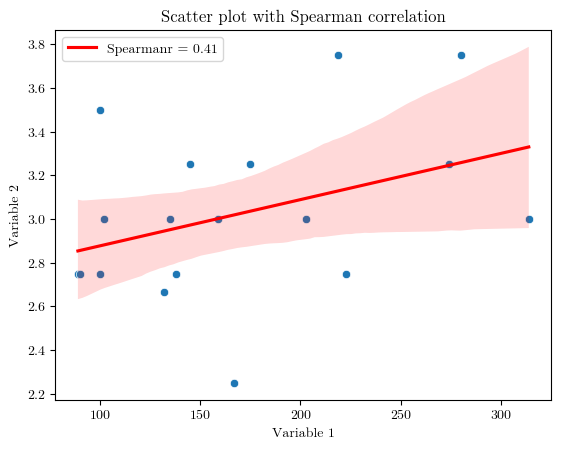

In [20]:
sns.scatterplot(x=dfPar1['StopwordCount'], y=list3)
sns.regplot(x=dfPar1['StopwordCount'], y=list3, scatter=False, color='r', 
            label=r'Spearmanr = {:.2f}'.format(res.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Spearman correlation')

plt.legend()
plt.show()

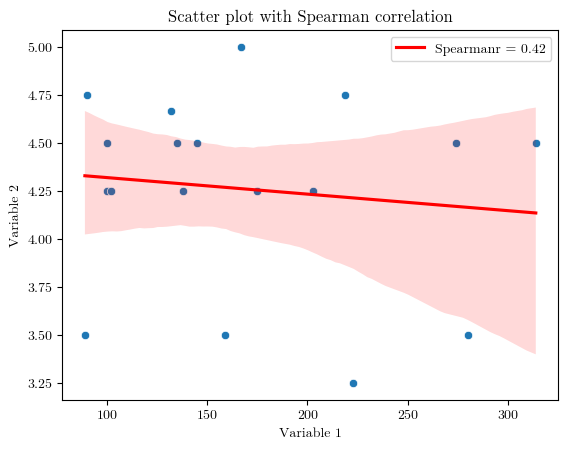

In [23]:
sns.scatterplot(x=dfPar1['StopwordCount'], y=list5)
sns.regplot(x=dfPar1['StopwordCount'], y=list5, scatter=False, color='r', 
            label=r'Spearmanr = {:.2f}'.format(res2.correlation))

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter plot with Spearman correlation')

plt.legend()
plt.show()

### Player2 Dominance and Involvement

In [24]:
res = stats.spearmanr(dfPar1['StopwordCount'].tolist(), list2)
res2 = stats.spearmanr(dfPar1['StopwordCount'].tolist(), list4)

In [25]:
print(res)
print(res2)

SpearmanrResult(correlation=0.016973091927612243, pvalue=0.9467048507553074)
SpearmanrResult(correlation=-0.28386402322748583, pvalue=0.253640712374886)


## Kendall's Tau
- Number of Stopwords uttered by Mediator is correlated with Mediator Intervention
- Not Statistically Significant

In [16]:
res1 = stats.kendalltau(dfMediator['StopwordCount'].tolist(), list1)
correlation_coefficient = res1.correlation
p_value = res1.pvalue

print("Kendall's tau correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Kendall's tau correlation coefficient: 0.3228233484619438
P-value: 0.0777843450583517
The correlation is not statistically significant at the 0.05 level.


## Point Biserial
- Number of Stopwords uttered by Mediator is correlated with Mediator Intervention
- Not Statistically Significant

In [17]:
res2 = stats.pointbiserialr(dfMediator['StopwordCount'].tolist(), list1)
correlation_coefficient = res2.correlation
p_value = res2.pvalue

print("Point-biserial correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 0.05 level.")
else:
    print("The correlation is not statistically significant at the 0.05 level.")

Point-biserial correlation coefficient: 0.4152022783973638
P-value: 0.08663196249871084
The correlation is not statistically significant at the 0.05 level.


## Regression

In [18]:
X = sm.add_constant(dfMediator['StopwordCount'])

model = sm.RLM(list1, X, M=sm.robust.norms.HuberT())
results = model.fit()

print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   18
Model:                            RLM   Df Residuals:                       16
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 15 Apr 2023                                         
Time:                        13:25:13                                         
No. Iterations:                    17                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4052      0.439      5.481